In [15]:
import praw
import seaborn as sns
import re 
import pandas as pd

In [3]:
reddit = praw.Reddit(client_id='nS7j3cW_xkph4DnzriV2hw', client_secret='ts7FeiMBRnNuTdQ10jnmkFU9cgdX5A', user_agent='Muhammad Hamza Chippa')

## Post Scraping

In [26]:
def scrape_posts(topic , number):
    posts= []
    sub_reddits = reddit.subreddit(topic)
    for post in sub_reddits.hot(limit=number):
        posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
    posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
    return posts

In [34]:
sports = scrape_posts('sports' , 10000)
sports.head()

,title,score,id,subreddit,url,num_comments,body,created
0,Abdi Nageeye pushes his best friend Bashir Abd...,14579,p09pxg,sports,https://v.redd.it/vzi4v6mlx2g71,287,,1.628405e+09
1,"USA secures the most Olympic Medals, to includ...",1805,p09bsn,sports,https://olympics.com/tokyo-2020/olympic-games/...,438,,1.628403e+09
2,Lionel Messi gets a standing ovation at his Ba...,668,p0cn8j,sports,https://streamable.com/gjezda,76,,1.628420e+09
3,1993: Javier Sotomayor establishes a high jump...,910,p0bd23,sports,https://v.redd.it/0c19sw32n3g71,36,,1.628413e+09
4,Morhad Amdouni (France) deliberately knocks ov...,360,p0dino,sports,https://twitter.com/pvalstar/status/1424300835...,83,,1.628425e+09


In [35]:
technology = scrape_posts('technology',10000)
technology.head()

,title,score,id,subreddit,url,num_comments,body,created
0,Got a tech question or want to discuss tech? B...,37,omsthz,technology,https://www.reddit.com/r/technology/comments/o...,130,"##Greetings Good People of /r/Technology,\n\nW...",1.626623e+09
1,Why We Should End the Data Economy - The data ...,21492,p0cow5,technology,https://thereboot.com/why-we-should-end-the-da...,751,,1.628420e+09
2,Epic Games CEO warns of Apple 'state surveilla...,14137,p0193b,technology,https://www.imore.com/epic-games-ceo-warns-app...,1314,,1.628370e+09
3,FTC slams Facebook for suspending researchers ...,2882,p05tsj,technology,https://www.businessinsider.com/ftc-slams-face...,113,,1.628387e+09
4,"Facebook shut down political ad research, dari...",61,p0mkgz,technology,https://mashable.com/article/facebook-nyu-ad-o...,23,,1.628455e+09


In [36]:
politics = scrape_posts('politics' , 10000)
politics.head()

,title,score,id,subreddit,url,num_comments,body,created
0,Saturday Morning Political Cartoon Thread,132,ozut9m,politics,https://www.reddit.com/r/politics/comments/ozu...,117,"It's Saturday, folks. Let's all kick back with...",1.628348e+09
1,CNN's Jim Acosta said scientists should name C...,60519,p0f3op,politics,https://www.businessinsider.com/cnn-jim-acosta...,3350,,1.628431e+09
2,Republicans are the 21st Century Know-Nothing ...,8631,p0ehyv,politics,https://thehill.com/opinion/campaign/566886-re...,423,,1.628429e+09
3,A Texas school district asked a Black principa...,4239,p0fufa,politics,https://www.businessinsider.com/texas-principa...,543,,1.628434e+09
4,Republicans are winning political battles by a...,6121,p0dy9o,politics,https://www.businessinsider.com/copnservatives...,513,,1.628426e+09


In [37]:
print(sports.shape)
print(technology.shape)
print(politics.shape)

(443, 8)
(607, 8)
(785, 8)


In [62]:
final_data = sports_data = pd.concat([sports,technology,politics])

In [63]:
final_data.shape

(1835, 8)

In [65]:
final_data.head()

,title,score,id,subreddit,url,num_comments,body,created
0,Abdi Nageeye pushes his best friend Bashir Abd...,14579,p09pxg,sports,https://v.redd.it/vzi4v6mlx2g71,287,,1.628405e+09
1,"USA secures the most Olympic Medals, to includ...",1805,p09bsn,sports,https://olympics.com/tokyo-2020/olympic-games/...,438,,1.628403e+09
2,Lionel Messi gets a standing ovation at his Ba...,668,p0cn8j,sports,https://streamable.com/gjezda,76,,1.628420e+09
3,1993: Javier Sotomayor establishes a high jump...,910,p0bd23,sports,https://v.redd.it/0c19sw32n3g71,36,,1.628413e+09
4,Morhad Amdouni (France) deliberately knocks ov...,360,p0dino,sports,https://twitter.com/pvalstar/status/1424300835...,83,,1.628425e+09


## Cleaning Posts

<AxesSubplot:>

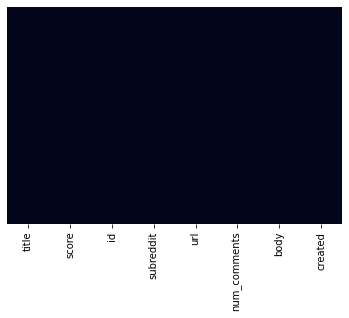

In [66]:
sns.heatmap(final_data.isnull(),yticklabels=False, cbar = False)

In [67]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def url_free_text(text):
    '''
    Cleans text from urls
    '''
    text = re.sub(r'http\S+', '', text)
    return text

In [68]:
final_data['emoji_free_title'] = final_data['title'].apply(remove_emojis) 
final_data['posts'] = final_data['emoji_free_title'].apply(url_free_text)

In [69]:
final_data.head()

,title,score,id,subreddit,url,num_comments,body,created,emoji_free_title,posts
0,Abdi Nageeye pushes his best friend Bashir Abd...,14579,p09pxg,sports,https://v.redd.it/vzi4v6mlx2g71,287,,1.628405e+09,Abdi Nageeye pushes his best friend Bashir Abd...,Abdi Nageeye pushes his best friend Bashir Abd...
1,"USA secures the most Olympic Medals, to includ...",1805,p09bsn,sports,https://olympics.com/tokyo-2020/olympic-games/...,438,,1.628403e+09,"USA secures the most Olympic Medals, to includ...","USA secures the most Olympic Medals, to includ..."
2,Lionel Messi gets a standing ovation at his Ba...,668,p0cn8j,sports,https://streamable.com/gjezda,76,,1.628420e+09,Lionel Messi gets a standing ovation at his Ba...,Lionel Messi gets a standing ovation at his Ba...
3,1993: Javier Sotomayor establishes a high jump...,910,p0bd23,sports,https://v.redd.it/0c19sw32n3g71,36,,1.628413e+09,1993: Javier Sotomayor establishes a high jump...,1993: Javier Sotomayor establishes a high jump...
4,Morhad Amdouni (France) deliberately knocks ov...,360,p0dino,sports,https://twitter.com/pvalstar/status/1424300835...,83,,1.628425e+09,Morhad Amdouni (France) deliberately knocks ov...,Morhad Amdouni (France) deliberately knocks ov...


In [70]:
final_data.drop(columns = ['emoji_free_title' , 'title'] , inplace = True)

In [71]:
final_data.head()

,score,id,subreddit,url,num_comments,body,created,posts
0,14579,p09pxg,sports,https://v.redd.it/vzi4v6mlx2g71,287,,1.628405e+09,Abdi Nageeye pushes his best friend Bashir Abd...
1,1805,p09bsn,sports,https://olympics.com/tokyo-2020/olympic-games/...,438,,1.628403e+09,"USA secures the most Olympic Medals, to includ..."
2,668,p0cn8j,sports,https://streamable.com/gjezda,76,,1.628420e+09,Lionel Messi gets a standing ovation at his Ba...
3,910,p0bd23,sports,https://v.redd.it/0c19sw32n3g71,36,,1.628413e+09,1993: Javier Sotomayor establishes a high jump...
4,360,p0dino,sports,https://twitter.com/pvalstar/status/1424300835...,83,,1.628425e+09,Morhad Amdouni (France) deliberately knocks ov...


In [72]:
final_data.rename(columns={'subreddit':'class'}, inplace = True)

In [73]:
final_data.head()

,score,id,class,url,num_comments,body,created,posts
0,14579,p09pxg,sports,https://v.redd.it/vzi4v6mlx2g71,287,,1.628405e+09,Abdi Nageeye pushes his best friend Bashir Abd...
1,1805,p09bsn,sports,https://olympics.com/tokyo-2020/olympic-games/...,438,,1.628403e+09,"USA secures the most Olympic Medals, to includ..."
2,668,p0cn8j,sports,https://streamable.com/gjezda,76,,1.628420e+09,Lionel Messi gets a standing ovation at his Ba...
3,910,p0bd23,sports,https://v.redd.it/0c19sw32n3g71,36,,1.628413e+09,1993: Javier Sotomayor establishes a high jump...
4,360,p0dino,sports,https://twitter.com/pvalstar/status/1424300835...,83,,1.628425e+09,Morhad Amdouni (France) deliberately knocks ov...


In [74]:
# retaining only useful columns 
posts = final_data.drop(columns = ['score', 'id' , 'url' , 'num_comments' , 'body' , 'created'])
posts.head()

,class,posts
0,sports,Abdi Nageeye pushes his best friend Bashir Abd...
1,sports,"USA secures the most Olympic Medals, to includ..."
2,sports,Lionel Messi gets a standing ovation at his Ba...
3,sports,1993: Javier Sotomayor establishes a high jump...
4,sports,Morhad Amdouni (France) deliberately knocks ov...


In [76]:
posts.to_csv("Reddit.csv" , index = False)